How do I know thats good
enought

Machine Learning resilient to noise - removing PII can actually reduce overfitting

Next 6 weeks, evaluating synthetic data methods



# What is synthetic data?
Synthetic data are generated to meet specific needs or certain conditions that may not be found in the original, real data. This can be useful when designing any type of system because the synthetic data are used as a simulation or as a theoretical value, situation, etc. 

## What is our use case?
YiCheng Li, AutoML: "For you who are interested, here are some contexts of our current project. We are trying to help the Azure AutoML team to obtain more benchmarking datasets to improve the system. The customer data are definitely more diversified and representative to the real world data than those from open source/inner database. In order to make use of those to get the ML efficacy we want while not violating any rules/laws, we then try to generate synthetic data based on that. 

Currently, we are using a variational auto-encoder trained with the DP-SGD algorithm. It allows us to track the privacy cost and enables early-stop if the privacy budget epsilon reaches a preset bound. The bound I use now is 2.0, which seems to be a fair choice based on your responses. With this choice, the results show that for even moderate/large dataset, we could get synthetic data with accepted ML efficacy."

# MWEM
MWEM can serve as one of our baseline synthetic data offerings. MWEM is a differentially private, broadly applicable and relatively simple algorithm, capable of
substantially improving the performance of linear queries on many realistic datasets. 
Linear queries are equivalent to statistical queries. They can serve as the basis of a wide range of
data analysis and learning algorithms. An example would be COUNT.

## What is MWEM?
MWEM is a differentially private synthetic data algorithm. It combines the Multiplicative Weights approach (which maintains and
corrects an approximating distribution through queries where approximate and true datasets
differ) with the Exponential Mechanism (which selects the queries most informative to the Multiplicative Weights algorithm (specifically, those most incorrect vis-a-vis the current approximation)).

## Why is it interesting?
The approach combines expert learning techniques (multiplicative weights) with an active learning component (via the exponential mechanism).

## As far as I know, this would be the only open source python n-dimensional MWEM implementation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from mwem import MWEMSynthesizer as mwem_normal
from mwem_factored_histograms import MWEMSynthesizer as mwem_factored

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# df = pd.read_csv('fake_datasets/pums.csv')
# df = df.drop(['pid', 'income'], axis=1)

#df = pd.read_csv('fake_datasets/haberman.csv')
# x all columns before married, y is married.

df = pd.read_csv('fake_datasets/cancer.csv')
df = df.drop(['pid','normal','bland','mitoses','bare','single'], axis=1)
df['class'] = df['class'].map({4: 1, 2: 0})
nf = df.to_numpy()

synth = MWEMSynthesizer(200, 10.0, 30, 20)
synth.fit(nf)
print('FAKE')
print(synth.synthetic_data)
print('REAL')
print(synth.real_data)
sample_size = 699 #306 #1000
synthetic = synth.sample(int(sample_size))

# Create new synthetic dataframe
synth_df = pd.DataFrame(synthetic, 
    index=df.index,
    columns=df.columns)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_synth = synth_df.iloc[:, :-1]
y_synth = synth_df.iloc[:, -1]
X.head, y.head, X_synth.head, y_synth.head

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17


/mnt/c/Users/lurosenb/whitenoise/fork2/whitenoise-system/service/modules/synthetic-data-module/mwem/mwem.py:317: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  e = data.T[a_slice]
/mnt/c/Users/lurosenb/whitenoise/fork2/whitenoise-system/service/modules/synthetic-data-module/mwem/mwem.py:339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  view.T[a_slice] = 1.0


Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
FAKE
[[[[3.02403565e+01 3.02403565e+01]
   [3.02403565e+01 3.02403565e+01]
   [4.95626806e+00 1.79246000e+00]
   ...
   [1.61534791e-01 1.61534791e-01]
   [1.61534791e-01 1.61534791e-01]
   [1.61534791e-01 1.61534791e-01]]

  [[3.02403565e+01 3.02403565e+01]
   [3.02403565e+01 3.69312362e+00]
   [4.95626806e+00 2.18905368e-01]
   ...
   [1.61534791e-01 1.61534791e-01]
   [1.61534791e-01 1.61534791e-01]
   [1.61534791e-01 1.61534791e-01]]

  [[2.01328343e+00 2.01328343e+00]
   [2.01328343e+00 2.45873577e-01]
   [3.29968742e-01 1.45738544e-02]
   ...
   [1.61534791e-01 1.61534791e-01]
   [1.61534791e-01 1.61534791e-01]
   [1.61534791e-01 1.61534791e-01]]

  ...

  [[3.00707818e-01 3.46837367e-02]
   [1.36617521e-01 1.57575089e-02]
   [1.41750371e-02 1.63495335e-03]
   ...
   [1.61534791e-01 1.86314748e-02]
   [1.61534791e-

(<bound method NDFrame.head of          clump  uniform  marginal
 1000025      1        1         1
 1002945      4        4         5
 1015425      1        1         1
 1016277      8        8         1
 1017023      1        1         3
 ...        ...      ...       ...
 776715       1        1         1
 841769       1        1         1
 888820      10       10         3
 897471       8        6         4
 897471       8        8         5
 
 [699 rows x 3 columns]>,
 <bound method NDFrame.head of 1000025    0
 1002945    0
 1015425    0
 1016277    0
 1017023    0
           ..
 776715     0
 841769     0
 888820     1
 897471     1
 897471     1
 Name: class, Length: 699, dtype: int64>,
 <bound method NDFrame.head of          clump  uniform  marginal
 1000025      1        9         4
 1002945      1        7         0
 1015425      3        4         5
 1016277      8        3         5
 1017023      1        7         0
 ...        ...      ...       ...
 776715       0      

In [2]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
x_train_synth, x_test_synth, y_train_synth, y_test_synth = train_test_split(X_synth, y_synth, test_size=0.1, random_state=42)

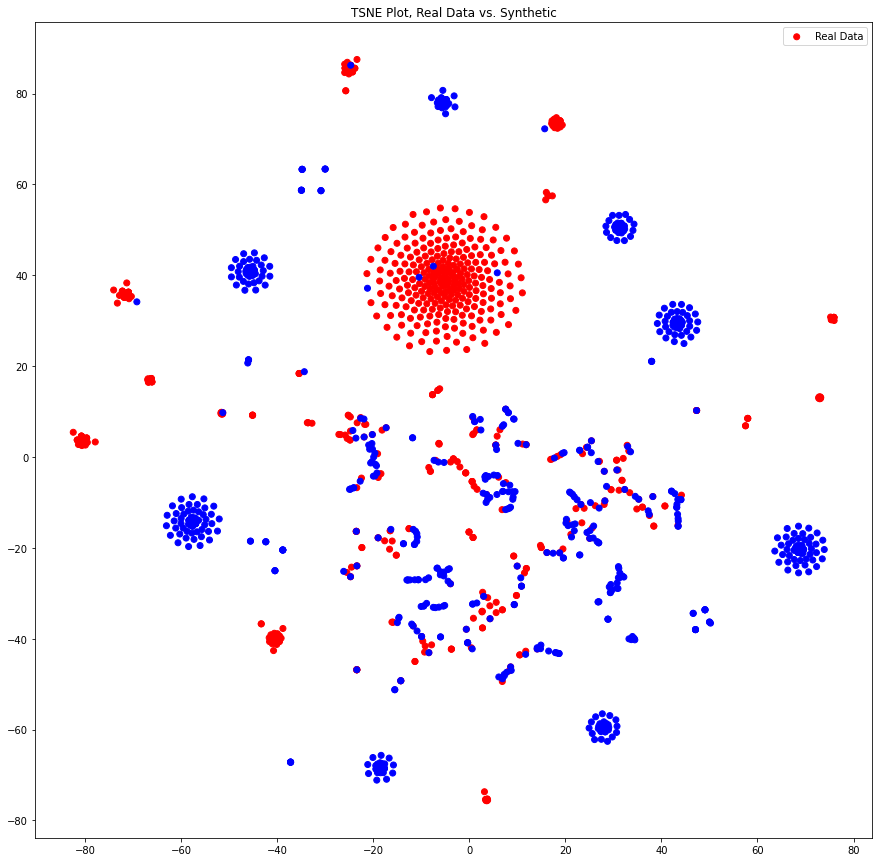

In [3]:
comb = np.vstack((x_train, x_train_synth))
embedding_1 = TSNE(n_components=2, perplexity=5.0, early_exaggeration=1.0).fit_transform(comb)
x,y = embedding_1.T
l = int(len(x) / 2)
inds = []

plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(x,y,c=['purple' if i in inds else 'red' for i in range(l)]+['purple' if j in inds else 'blue' for j in range(l)])
plt.gca().legend(('Real Data','Real'))
# plt.xlabel('This is the X axis label')
# plt.ylabel('This is the Y axis label')
plt.title('TSNE Plot, Real Data vs. Synthetic')
plt.show()

In [4]:
#Train the model
model_real = LogisticRegression()
model_real.fit(x_train, y_train)

model_fake = LogisticRegression()
model_fake.fit(x_train_synth, y_train_synth)

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
#Test the model
predictions = model_real.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

[0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0]

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        46
           1       0.96      0.92      0.94        24

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70

0.9571428571428572


In [6]:
#Test the model
predictions = model_fake.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        46
           1       1.00      0.62      0.77        24

    accuracy                           0.87        70
   macro avg       0.92      0.81      0.84        70
weighted avg       0.89      0.87      0.86        70

0.8714285714285714


In [7]:
df = pd.read_csv('fake_datasets/fake_data_2d.csv')
nf = df.to_numpy()

synth = MWEMSynthesizer(400, 10.0, 30, 20)
synth.fit(nf)
print('FAKE')
print(synth.synthetic_data)
print('REAL')
print(synth.real_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


/mnt/c/Users/lurosenb/whitenoise/fork2/whitenoise-system/service/modules/synthetic-data-module/mwem/mwem.py:317: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  e = data.T[a_slice]
/mnt/c/Users/lurosenb/whitenoise/fork2/whitenoise-system/service/modules/synthetic-data-module/mwem/mwem.py:339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  view.T[a_slice] = 1.0


Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
FAKE
[[1.14555202 1.05774231 1.05774231 ... 1.14555202 1.14555202 1.14555202]
 [1.14555202 1.05774231 1.05774231 ... 1.04100078 1.14555202 1.14555202]
 [1.14555202 1.05774231 1.05774231 ... 1.04100078 1.14555202 1.14555202]
 ...
 [1.14555202 1.14555202 1.14555202 ... 1.14555202 1.14555202 1.14555202]
 [1.14555202 1.14555202 1.14555202 ... 1.14555202 1.14555202 1.14555202]
 [1.14555202 1.14555202 1.14555202 ... 1.14555202 1.14555202 1.14555202]]
REAL
[[1. 1. 3. ... 0. 0. 0.]
 [1. 1. 1. ... 2. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 6. 2. 3.]
 [1. 0. 0. ... 5. 6. 5.]
 [1. 0. 1. ... 1. 5. 5.]]


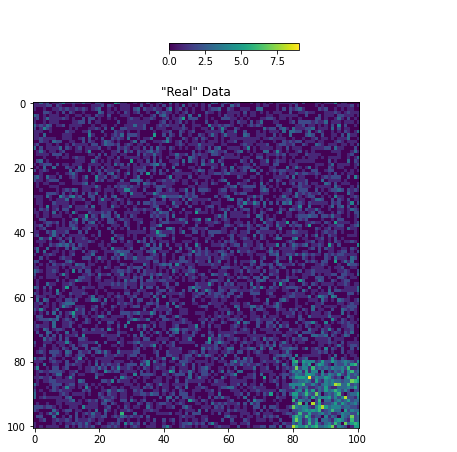

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_title('"Real" Data')
plt.imshow(synth.real_data)
ax.set_aspect('equal')
cax = fig.add_axes([0.1, 1.0, 1., 0.1])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.set_frame_on(False)
plt.colorbar(orientation='horizontal')
plt.show()

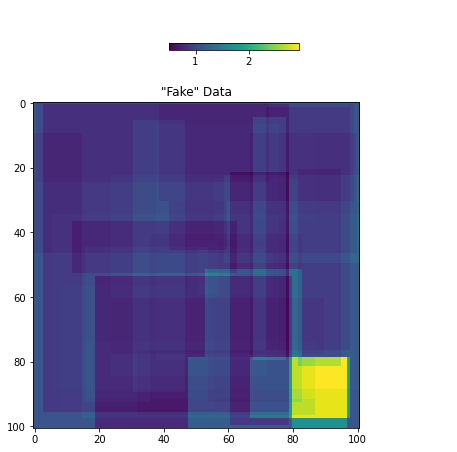

In [9]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title('"Fake" Data')
plt.imshow(synth.synthetic_data)
cax = fig.add_axes([0.1, 1.0, 1., 0.1])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.set_frame_on(False)
plt.colorbar(orientation='horizontal')
plt.show()

In [ ]:
df = pd.read_csv('fake_datasets/fake_data_3d_10.csv')
nf = df.to_numpy()

synth = MWEMSynthesizer(400, 3.0, 10, 20)
synth.fit(nf)
print('FAKE')
print(synth.synthetic_data)
print('REAL')
print(synth.real_data)

In [ ]:
# Aggregate along one axis for plotting : )
agg_synth = synth.synthetic_data[0,:,:]
for i in range(1,synth.synthetic_data.shape[0]):
    agg_synth += synth.synthetic_data[i,:,:]

agg_real = synth.real_data[0,:,:]
for i in range(1,synth.real_data.shape[0]):
    agg_real += synth.real_data[i,:,:]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_title('"Real" Data')
plt.imshow(agg_real)
ax.set_aspect('equal')
cax = fig.add_axes([0.1, 1.0, 1., 0.1])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.set_frame_on(False)
plt.colorbar(orientation='horizontal')
plt.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_title('"Fake" Data')
plt.imshow(agg_synth)
ax.set_aspect('equal')
cax = fig.add_axes([0.1, 1.0, 1., 0.1])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.set_frame_on(False)
plt.colorbar(orientation='horizontal')
plt.show()